Progress: Simulation 200 out of 200. 100.0% done


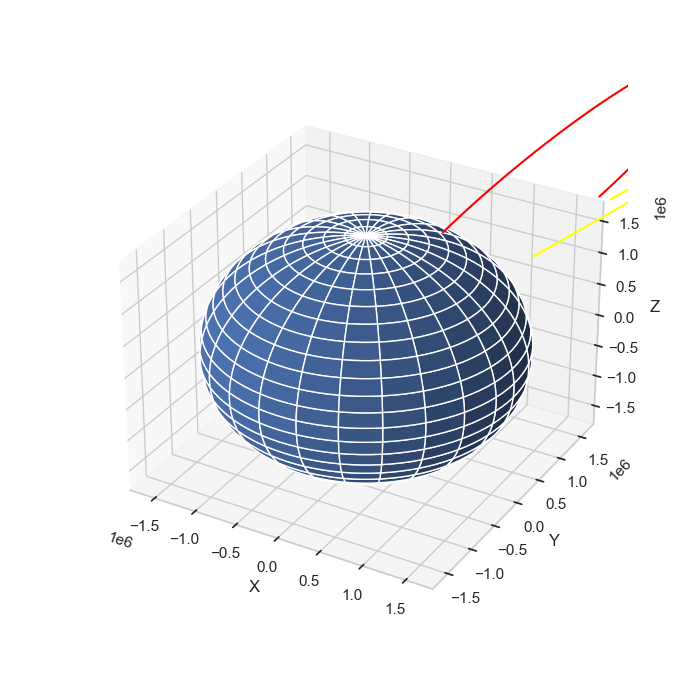

,XPosd,YPosd,ZPosd
0,503.041071,509.191052,833.437531
1,492.737853,497.050736,820.265463
2,456.902867,466.987279,777.872080
3,431.470662,450.138036,755.963958
4,414.947676,428.969930,734.928525
...,...,...,...
97,-688.044214,-697.396485,-1070.494409
98,-714.030672,-729.450664,-1142.757199
99,-743.703296,-766.286953,-1218.448902
100,-772.626288,-797.962002,-1287.980308


In [7]:
%matplotlib widget

import math
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.preprocessing import Normalizer
import matplotlib.animation as animation
import plotly
import plotly.graph_objs as go
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from IPython.display import clear_output
from sklearn.linear_model import LogisticRegression
import io
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from mpl_toolkits.mplot3d import Axes3D
# Bundeled Data for visualisation

Object2Mass = 7.3476731e+22
Object2Radius = 1737400 

# Physics Constants
GravConstant =  6.67e-11

# Physics update steps per second and max simulation time

StepsPerSecond = int(input("How many physics simulation steps per second? "))
TNOS = int(input("How many total simulations would you like to run? "))
MaxSimulationTime = int(input("How long would you like the simulation to be (in seconds)? "))
#MaxSimulationTime = int(input("How long would you like the simulation to be (in seconds)? "))

# Definitions before simulation
velbundley = []
velbundlex = []
velbundlez = []


velbundlet = []
timebundle = []

XBundle = []
YBundle = []
ZBundle = []



# Movement and position updates, the equations are derived from the universal gravitational equation and trigonometry.
NOS = 0
while True:
    clear_output()
    print("Progress: Simulation {} out of {}. {}% done".format(NOS, TNOS, (NOS / TNOS) * 100))
    counter = 0
    TestSimData = []
    SimData = []
    dt = 1 / StepsPerSecond

    # Initial Small Object Conditions
    XPos1 = 1737400 + random.randint(0,200000)
    YPos1 = 1737400 + random.randint(0,200000)
    ZPos1 = 1737400 + random.randint(0,200000)
        

        
    XVel1 = random.randint(0,1000)
    YVel1 = random.randint(0,1000)
    ZVel1 = random.randint(0,1000)

    XPosInital = XPos1
    YPosInital = YPos1
    ZPosInital = ZPos1
    # Large Object Conditions
    XPos2 = 0
    YPos2 = 0
    ZPos2 = 0
    counter = 0
    simulating = True
    t = 0
    while simulating == True:
        # t is the current time, dt is the change in time that is defined by StepsPerSecond
        t = t + dt
        # Tracking positions and velocities of X and Y over time by storing them in lists that are equivelant to the time steps
        
        velbundley.append(YVel1)
        velbundlex.append(XVel1)
        velbundlez.append(ZVel1)
        
        TotalVel = (XVel1 ** 2) + (YVel1 ** 2) + (ZVel1 ** 2)
        
        velbundlet.append(TotalVel)
        timebundle.append(t)
        
        
        XSeperation = (XPos1 - XPos2)
        YSeperation = (YPos1 - YPos2)
        ZSeperation = (ZPos1 - ZPos2)
        
        
        Radius = ((XSeperation ** 2) + (YSeperation ** 2) + (ZSeperation ** 2)) ** 0.5
        
        AccelMag = (GravConstant * Object2Mass) / (Radius ** 2)
        
        
        AngleX = math.acos(XSeperation / Radius)
        AngleY = math.acos(YSeperation / Radius)
        AngleZ = math.acos(ZSeperation / Radius)

        
        XGravAccel1 = -1 * AccelMag * math.cos(AngleX)
        YGravAccel1 = -1 * AccelMag * math.cos(AngleY)
        ZGravAccel1 = -1 * AccelMag * math.cos(AngleZ)
        
        # Angle definition from x and y seperation
        # Angle = math.atan2(YSeperation, XSeperation)
        # XGravAccel1 = -1 * ((GravConstant * Object2Mass) / (Radius ** 2)) * math.cos(Angle)
        # YGravAccel1 = -1 * ((GravConstant * Object2Mass) / (Radius ** 2)) * math.sin(Angle)


        #First measurement
        XPosi = XPos1
        YPosi = YPos1
        ZPosi = ZPos1
        
        XVeli = XVel1
        YVeli = YVel1
        ZVeli = ZVel1

        # Updated Velocity From Acceleration
        XVel1 = XVel1 + XGravAccel1 * dt
        YVel1 = YVel1 + YGravAccel1 * dt
        ZVel1 = ZVel1 + ZGravAccel1 * dt
        # Updated Position From Velocity
        XPos1 = XPos1 + XVel1 * dt
        YPos1 = YPos1 + YVel1 * dt
        ZPos1 = ZPos1 + ZVel1 * dt
        
        XPosf = XPos1
        YPosf = YPos1
        ZPosf = ZPos1
        
        XVelf = XVel1
        YVelf = YVel1
        ZVelf = ZVel1        
        
        if t % 100 == True:
            #StoreImportantData = [XPosi, YPosi, ZPosi, XVeli, YVeli, ZVeli, XPosf, YPosf, ZPosf, XVelf, YVelf, ZVelf]
            XPosd = XPosf - XPosi
            YPosd = YPosf - YPosi
            ZPosd = ZPosf - ZPosi
            
            XVeld = XVelf - XVeli
            YVeld = YVelf - YVeli
            ZVeld = ZVelf - ZVeli
            StoreImportantData = [XPosd, YPosd, ZPosd, XVeld, YVeld, ZVeld]
            SimData.append(StoreImportantData)
        TestNumberOfSeconds = 0    
        if NOS == TNOS:
            if t % 100 == True:
                XBundle.append(XPos1)
                YBundle.append(YPos1)
                ZBundle.append(ZPos1)
                XPosd = XPosf - XPosi
                YPosd = YPosf - YPosi
                ZPosd = ZPosf - ZPosi
                
                XVeld = XVelf - XVeli
                YVeld = YVelf - YVeli
                ZVeld = ZVelf - ZVeli
                StoreImportantData2 = [XPosd, YPosd, ZPosd, XVeld, YVeld, ZVeld]
                TestSimData.append(StoreImportantData2)    
                TestNumberOfSeconds = TestNumberOfSeconds + 1
                
        counter = counter + 1
        if t > MaxSimulationTime:
            break
        if Radius < Object2Radius:
            break   
    NOS = NOS + 1
    if NOS > TNOS:
        break
    
    
testfulldataframe = []
fulldataframe = pd.DataFrame(columns=['XPosd', 'YPosd', 'ZPosd', 'XVeld', 'YVeld', 'ZVeld'], data=SimData)

testfulldataframe = pd.DataFrame(columns=['XPosd', 'YPosd', 'ZPosd', 'XVeld', 'YVeld', 'ZVeld'], data=TestSimData)



trainset, testset = train_test_split(fulldataframe, test_size=0.2)


PredictionDataFrame = []
CounterPred = 0
PredictionData = []
TestingData = []
ToPredict = ['XPosd', 'YPosd', 'ZPosd']
while CounterPred < len(ToPredict):
    X_train = trainset.drop(ToPredict[CounterPred], axis = 1)
    Y_train = trainset[ToPredict[CounterPred]]
    X_test = testfulldataframe.drop(ToPredict[CounterPred], axis=1).copy()
    Y_test = testfulldataframe[ToPredict[CounterPred]]
    
    random_forest = RandomForestRegressor(n_estimators=100)
    random_forest.fit(X_train, Y_train)
    Y_pred = random_forest.predict(X_test)
    random_forest.score(X_train, Y_train)
    
    PredictionDataFrame.append(Y_pred)
    
    CounterPred = CounterPred + 1



#XDiff = testfulldataframe['XPosd']
#YDiff = testfulldataframe['YPosd']
#ZDiff = testfulldataframe['ZPosd']

PredictionDataFrame = pd.DataFrame(PredictionDataFrame)
PredictionDataFrame = PredictionDataFrame.T
PredictionDataFrame.columns=['XPosd', 'YPosd', 'ZPosd']



XPosP = XPosInital
YPosP = YPosInital
ZPosP = ZPosInital

XPosPG = []
YPosPG = []
ZPosPG = []
    

XPosUpdate = PredictionDataFrame['XPosd'].tolist()
YPosUpdate = PredictionDataFrame['YPosd'].tolist()
ZPosUpdate = PredictionDataFrame['ZPosd'].tolist()
AISimTimer = 0
while AISimTimer < TestNumberOfSeconds:
    
    XPosP = XPosP + XPosUpdate[AISimTimer]
    YPosP = YPosP + YPosUpdate[AISimTimer]
    ZPosP = ZPosP + ZPosUpdate[AISimTimer]
    
    AISimTimer = AISimTimer + 1
    XPosPG.append(XPosP)
    YPosPG.append(YPosP)
    ZPosPG.append(ZPosP)
    



drawgraph = int(input("Would you like to draw a graph? 1 for yes, 0 for no: "))

if drawgraph == 1:
    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111, projection='3d')
    zline = ZBundle
    xline = XBundle
    yline = YBundle
    ax.plot3D(xline, yline, zline, 'red')
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)

    XPosPG = ZBundle
    YPosPG = YBundle
    ZPosPG = ZBundle
    
    ax.plot3D(XPosPG, YPosPG, ZPosPG, 'yellow')
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)

    ax.set_xlabel('X')
    ax.set_xlim(-Object2Radius * 1, Object2Radius * 1)
    ax.set_ylabel('Y')
    ax.set_ylim(-Object2Radius * 1, Object2Radius * 1)
    ax.set_zlabel('Z')
    ax.set_zlim(-Object2Radius * 1, Object2Radius * 1)

    x = 1737400 * np.outer(np.cos(u), np.sin(v))
    y = 1737400 * np.outer(np.sin(u), np.sin(v))
    z = 1737400 * np.outer(np.ones(np.size(u)), np.cos(v))

    ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b')
    plt.show()


#plt.plot(timebundle, XBundle, label = 'Xx')
#plt.plot(timebundle, YBundle, label = 'Yx')
#plt.plot(timebundle, ZBundle, label = 'Zx')
#plt.legend()    
#plt.show()




PredictionDataFrame


# Convert everything to functions for n bodies, like calling a method (eg an equation) and using inputs to find it out, eg Calculate(XPosition, YPosition, Weight) (replace with needed numbers) - DONT USE CLASSES
# Combine vectors in the end and use numpi to store values

